<a href="https://colab.research.google.com/github/kwy0828/DL2025/blob/main/17_BatchNormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 생성

In [ ]:
from sklearn.datasets import make_moons

# Generate the moons dataset
features, labels = make_moons(n_samples=1000, noise=0.05, random_state=42)

## 학습 데이터 시각화

생성된 학습 데이터를 시각화하여 데이터 분포를 확인합니다.

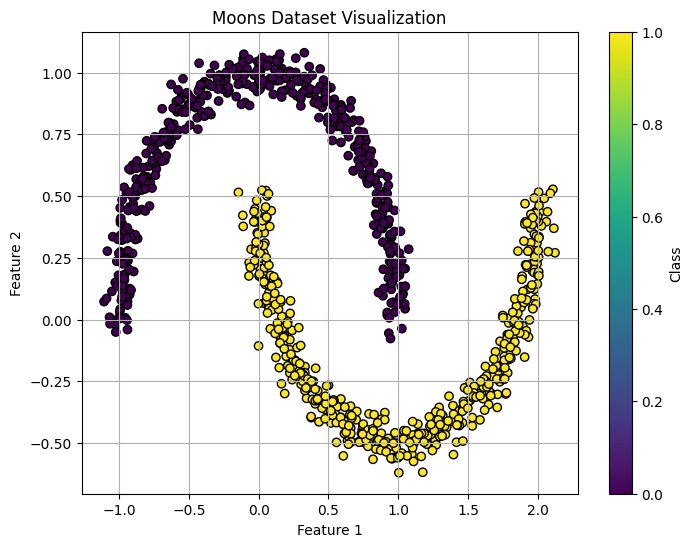

In [ ]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy for checking array types if needed

# Visualize the moons dataset
plt.figure(figsize=(8, 6))
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='k')
plt.title('Moons Dataset Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

## 학습 로더 생성

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert NumPy arrays to PyTorch tensors
features_tensor = torch.tensor(features, dtype=torch.float32)
labels_tensor = torch.tensor(labels, dtype=torch.long)

# Create a TensorDataset
dataset = TensorDataset(features_tensor, labels_tensor)

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [ ]:
from sklearn.datasets import make_moons
import torch
from torch.utils.data import TensorDataset, DataLoader

# Generate the moons dataset
features, labels = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Convert NumPy arrays to PyTorch tensors for DataLoader
features_tensor = torch.tensor(features, dtype=torch.float32)
labels_tensor = torch.tensor(labels, dtype=torch.long)

# Create a TensorDataset
dataset = TensorDataset(features_tensor, labels_tensor)

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

## 모델 정의 (batch normalization 미적용)

Batch Normalization이 적용되지 않은 간단한 신경망 모델을 정의합니다.


In [ ]:
import torch.nn as nn

**Reasoning**:
Define a simple neural network class without Batch Normalization as instructed.



In [ ]:
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(2, 64)
        self.sigmoid1 = nn.Sigmoid()
        self.layer2 = nn.Linear(64, 64)
        self.sigmoid2 = nn.Sigmoid()
        self.layer3 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.sigmoid1(self.layer1(x))
        x = self.sigmoid2(self.layer2(x))
        x = self.layer3(x)
        return x

## 모델 정의 (batch normalization 적용)

Batch Normalization이 적용된 신경망 모델을 정의합니다.


In [ ]:
from torch.nn import BatchNorm1d

**Reasoning**:
Define the `BN_NN` class with linear layers, BatchNorm1d, and ReLU activations as instructed.



In [ ]:
import torch.nn as nn
from torch.nn import BatchNorm1d

class BN_NN(nn.Module):
    def __init__(self):
        super(BN_NN, self).__init__()
        self.layer1 = nn.Linear(2, 64)
        self.bn1 = BatchNorm1d(64)
        self.sigmoid1 = nn.Sigmoid()
        self.layer2 = nn.Linear(64, 64)
        self.bn2 = BatchNorm1d(64)
        self.sigmoid2 = nn.Sigmoid()
        self.layer3 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.sigmoid1(self.bn1(self.layer1(x)))
        x = self.sigmoid2(self.bn2(self.layer2(x)))
        x = self.layer3(x)
        return x

## 모델 학습 및 출력 저장

두 모델을 학습시키면서 각 미니배치마다 특정 레이어의 출력을 저장합니다.


In [ ]:
import torch.optim as optim
import torch.nn as nn

# 1. Create instances of the models
model_no_bn = SimpleNN()
model_with_bn = BN_NN()

# 2. Define Adam optimizer for each model
optimizer_no_bn = optim.Adam(model_no_bn.parameters(), lr=0.001)
optimizer_with_bn = optim.Adam(model_with_bn.parameters(), lr=0.001)

# 3. Define CrossEntropyLoss as the loss function
criterion = nn.CrossEntropyLoss()

# 4. Set models to training mode (eval() mode is disabled)
model_no_bn.train()
model_with_bn.train()

# 5. Initialize empty lists to store layer outputs
layer_outputs_no_bn = []
layer_outputs_with_bn = []

# 6. Iterate through the dataloader for training and storing outputs and loss
train_losses_no_bn = []
train_losses_with_bn = []

In [ ]:
for inputs, labels in dataloader:
    # Training step for model without Batch Normalization
    optimizer_no_bn.zero_grad()  # a. Zero the gradients
    outputs_no_bn = model_no_bn(inputs)  # b. Forward pass
    # c. Store the output of the second linear layer
    # Accessing the output before the final layer (layer3) which is the output of layer2
    layer_output_no_bn = model_no_bn.sigmoid2(model_no_bn.layer2(model_no_bn.sigmoid1(model_no_bn.layer1(inputs)))).detach().numpy()
    layer_outputs_no_bn.append(layer_output_no_bn)
    loss_no_bn = criterion(outputs_no_bn, labels)  # d. Calculate loss
    train_losses_no_bn.append(loss_no_bn.item()) # Store training loss
    loss_no_bn.backward()  # e. Backward propagation
    optimizer_no_bn.step()  # f. Update weights

    # Training step for model with Batch Normalization
    optimizer_with_bn.zero_grad()  # a. Zero the gradients
    outputs_with_bn = model_with_bn(inputs)  # b. Forward pass
    # c. Store the output of the second linear layer
    # Accessing the output before the final layer (layer3) which is the output after bn2 and sigmoid2
    layer_output_with_bn = model_with_bn.sigmoid2(model_with_bn.bn2(model_with_bn.layer2(model_with_bn.sigmoid1(model_with_bn.bn1(model_with_bn.layer1(inputs)))))).detach().numpy()
    layer_outputs_with_bn.append(layer_output_with_bn)
    loss_with_bn = criterion(outputs_with_bn, labels)  # d. Calculate loss
    train_losses_with_bn.append(loss_with_bn.item()) # Store training loss
    loss_with_bn.backward()  # e. Backward propagation
    optimizer_with_bn.step()  # f. Update weights

# 7. Stored layer outputs are available in layer_outputs_no_bn and layer_outputs_with_bn
# Stored training losses are available in train_losses_no_bn and train_losses_with_bn

## Internal covariance shift 시각화

저장된 레이어 출력을 사용하여 Batch Normalization 적용 여부에 따른 internal covariance shift를 시각화합니다.


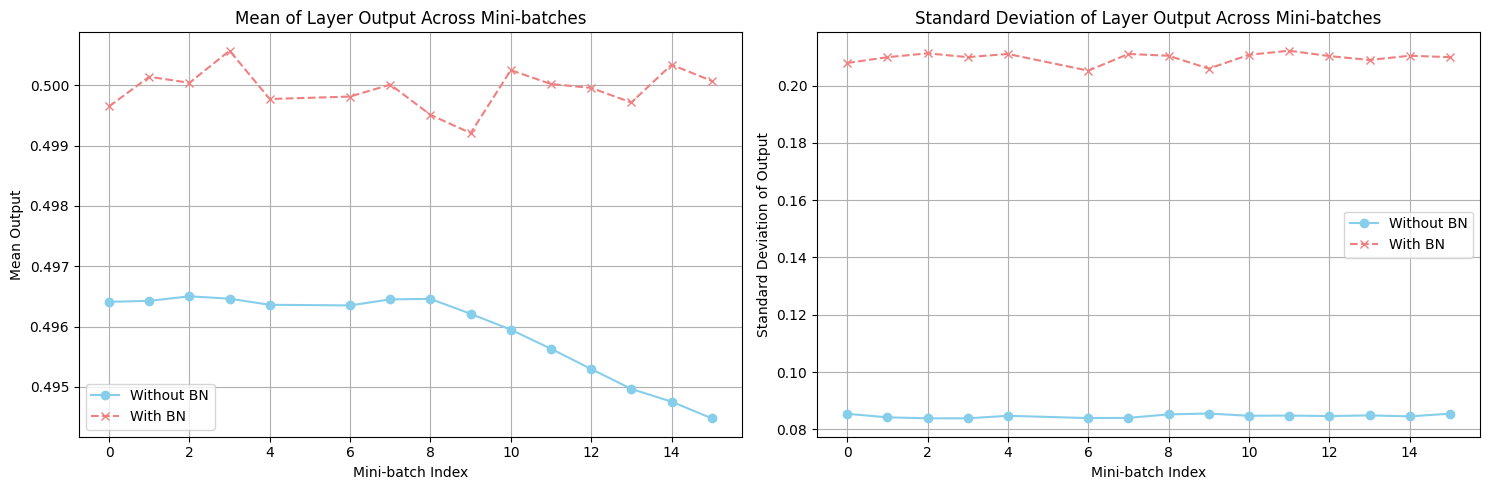

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Determine the number of mini-batches
num_batches = len(layer_outputs_no_bn)

# Choose a few representative mini-batches to visualize
# Selecting the first 5, 5 from the middle, and the last 5 batches
selected_indices = list(range(min(5, num_batches))) + \
                   list(range(max(0, num_batches // 2 - 2), min(num_batches, num_batches // 2 + 3))) + \
                   list(range(max(0, num_batches - 5), num_batches))

# Remove duplicates and sort the indices
selected_indices = sorted(list(set(selected_indices)))

# Store mean and standard deviation for selected batches
mean_no_bn = []
std_no_bn = []
mean_with_bn = []
std_with_bn = []
selected_batch_indices = []

for i in selected_indices:
    output_no_bn = layer_outputs_no_bn[i]
    output_with_bn = layer_outputs_with_bn[i]

    # Calculate mean and std across the feature dimension (axis=1)
    mean_no_bn.append(np.mean(output_no_bn, axis=1).mean()) # Mean across samples in batch
    std_no_bn.append(np.std(output_no_bn, axis=1).mean()) # Std across samples in batch

    mean_with_bn.append(np.mean(output_with_bn, axis=1).mean()) # Mean across samples in batch
    std_with_bn.append(np.std(output_with_bn, axis=1).mean()) # Std across samples in batch

    selected_batch_indices.append(i)

# Create two plots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot mean
axes[0].plot(selected_batch_indices, mean_no_bn, marker='o', linestyle='-', color='skyblue', label='Without BN')
axes[0].plot(selected_batch_indices, mean_with_bn, marker='x', linestyle='--', color='lightcoral', label='With BN')
axes[0].set_title('Mean of Layer Output Across Mini-batches')
axes[0].set_xlabel('Mini-batch Index')
axes[0].set_ylabel('Mean Output')
axes[0].legend()
axes[0].grid(True)

# Plot standard deviation
axes[1].plot(selected_batch_indices, std_no_bn, marker='o', linestyle='-', color='skyblue', label='Without BN')
axes[1].plot(selected_batch_indices, std_with_bn, marker='x', linestyle='--', color='lightcoral', label='With BN')
axes[1].set_title('Standard Deviation of Layer Output Across Mini-batches')
axes[1].set_xlabel('Mini-batch Index')
axes[1].set_ylabel('Standard Deviation of Output')
axes[1].legend()
axes[1].grid(True)

# Adjust layout and display plots
plt.tight_layout()
plt.show()

## 모델 정확도 평가

두 모델의 정확도를 평가하고 비교합니다.

In [ ]:
# Set models to evaluation mode (if not already)
model_no_bn.eval()
model_with_bn.eval()

correct_no_bn = 0
total_no_bn = 0
correct_with_bn = 0
total_with_bn = 0

with torch.no_grad():
    for inputs, labels in dataloader:
        # Evaluate model without Batch Normalization
        outputs_no_bn = model_no_bn(inputs)
        _, predicted_no_bn = torch.max(outputs_no_bn.data, 1)
        total_no_bn += labels.size(0)
        correct_no_bn += (predicted_no_bn == labels).sum().item()

        # Evaluate model with Batch Normalization
        outputs_with_bn = model_with_bn(inputs)
        _, predicted_with_bn = torch.max(outputs_with_bn.data, 1)
        total_with_bn += labels.size(0)
        correct_with_bn += (predicted_with_bn == labels).sum().item()

accuracy_no_bn = 100 * correct_no_bn / total_no_bn
accuracy_with_bn = 100 * correct_with_bn / total_with_bn

print(f'Accuracy of the model without Batch Normalization: {accuracy_no_bn:.2f}%')
print(f'Accuracy of the model with Batch Normalization: {accuracy_with_bn:.2f}%')

Accuracy of the model without Batch Normalization: 77.60%
Accuracy of the model with Batch Normalization: 83.30%


## 훈련 및 추론 로스 시각화

저장된 훈련 및 추론 로스를 사용하여 Batch Normalization 적용 여부에 따른 로스 변화를 시각화합니다.

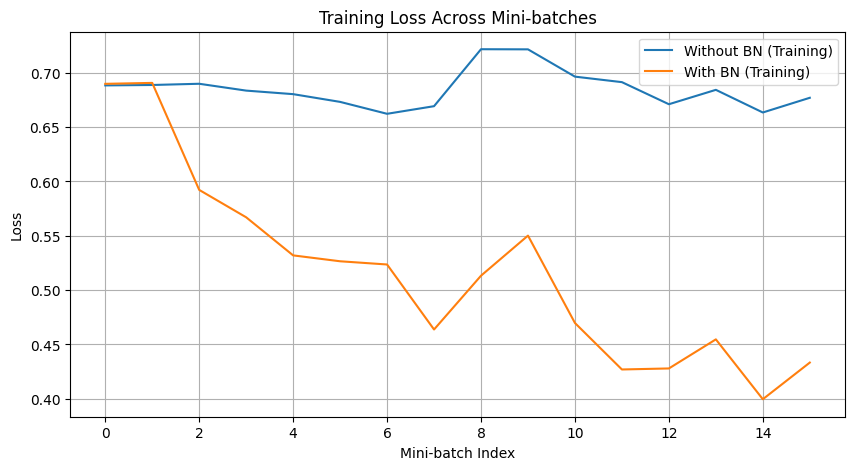

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses_no_bn, label='Without BN (Training)')
plt.plot(train_losses_with_bn, label='With BN (Training)')
plt.title('Training Loss Across Mini-batches')
plt.xlabel('Mini-batch Index')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()